<a href="https://colab.research.google.com/github/Alphaleader007/DL/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
N=1000
X=np.random.random((N,2))*6 -3
Y=np.cos(2*X[:,0])+np.cos(3*X[:,1])


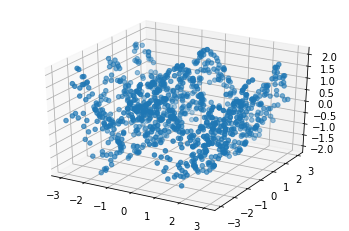

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)


In [ ]:
model=nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
def full_gd(model,criterion,optimizer,X_train,y_train,epochs=1000):
  train_losses=np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()
    outputs=model(X_train)
    loss=criterion(outputs,y_train)
    loss.backward()
    optimizer.step()
    train_losses[it]=loss.item()
    if (it+1)%50 == 0:
      print(f"Epoch {it+1}/{epochs} , Train Loss: {loss.item():.4f}")
  return train_losses
X_train=torch.from_numpy(X.astype(np.float32))
y_train=torch.from_numpy(Y.astype(np.float32).reshape(-1,1))
train_losses=full_gd(model,criterion,optimizer,X_train,y_train)

Epoch 50/1000 , Train Loss: 0.6943
Epoch 100/1000 , Train Loss: 0.3091
Epoch 150/1000 , Train Loss: 0.1128
Epoch 200/1000 , Train Loss: 0.0345
Epoch 250/1000 , Train Loss: 0.0128
Epoch 300/1000 , Train Loss: 0.0122
Epoch 350/1000 , Train Loss: 0.0053
Epoch 400/1000 , Train Loss: 0.0052
Epoch 450/1000 , Train Loss: 0.0044
Epoch 500/1000 , Train Loss: 0.0035
Epoch 550/1000 , Train Loss: 0.0032
Epoch 600/1000 , Train Loss: 0.0035
Epoch 650/1000 , Train Loss: 0.0028
Epoch 700/1000 , Train Loss: 0.0028
Epoch 750/1000 , Train Loss: 0.0069
Epoch 800/1000 , Train Loss: 0.0025
Epoch 850/1000 , Train Loss: 0.0024
Epoch 900/1000 , Train Loss: 0.0069
Epoch 950/1000 , Train Loss: 0.0022
Epoch 1000/1000 , Train Loss: 0.0138


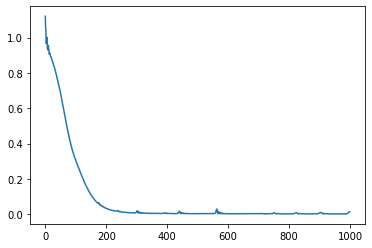

In [ ]:
plt.plot(train_losses)

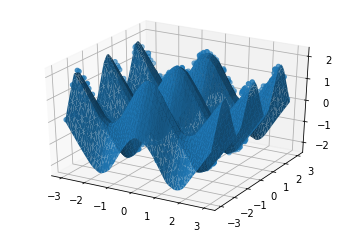

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()